In [1]:
from scipy.io import loadmat
from matplotlib import pyplot as plt
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy.sparse.linalg as ll
import sklearn.preprocessing as skpp
import pandas as pd

data1 = loadmat('data\isomap.mat')
im = data1['images'].reshape(64,64,698).T
data = data1['images']

In [39]:
from sklearn.metrics import pairwise_distances
n = 698
k = 2
eps = 2
d = data.T
euclidean_distances = np.ones((n, n)) * np.inf
adjacency_matrix = np.zeros((n, n))
a = np.zeros((n, n))
di = np.zeros((n, n)) 
for i in range(n):
    for j in range(n):
        if i != j:
            dist = np.sqrt(np.sum((d[i] - d[j]) ** 2))
            if dist <= eps:
                 adjacency_matrix[i,j] = dist
                 a[i,j] = 1 


weighted_matrix = np.zeros((m, m), dtype=float)
# Calculate pairwise distances between data points using a distance metric (e.g., Euclidean)
distances = pairwise_distances(data.reshape(-1, 1), metric='euclidean')

for i in range(n):
    # Find the index of the nearest neighbor for data point i
    nearest_neighbor_idx = np.argmin(distances[i])

    # Assign a weight of 1 to the nearest neighbor and 0 to all others
    weighted_matrix[i, nearest_neighbor_idx] = 1.0

#for i in range(n):
#    indices = np.argsort(adjacency_matrix[i])
#    for j in range(n):
#        if j > k:
#            adjacency_matrix[i][indices[j]] = 0
#sp = euclidean_distances < eps
#sp = euclidean_distances < eps
#di[sp] = euclidean_distances[sp]
#for i in range(n):
#    # Sort the similarities and get the indices of the k nearest neighbors
#    nearest_neighbors_indices = np.argsort(euclidean_distances[i])[:k]
#
#    # Set the corresponding entries in the adjacency matrix to 1
#    adjacency_matrix[i, nearest_neighbors_indices] = di[i, nearest_neighbors_indices]

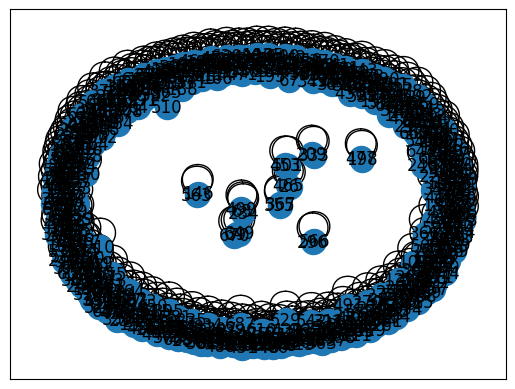

In [29]:
import networkx as nx
def createGraph(adjM):
  edges=[]
  noofvertices=len(adjM)
  for mat in adjM:
    if len(mat)>noofvertices or len(mat)<noofvertices:
      print("False Adjacency Matrix")
      return 0
  for i in range(len(adjM)):
    mat=adjM[i]
    for j in range(len(mat)):
      if mat[j]==1:
        temp=[i,j]
        edges.append(temp)
  G=nx.Graph()
  G.add_edges_from(edges)
  nx.draw_networkx(G)
  plt.show()
  vertices=[i for i in range(len(adjM))]
  return 

createGraph(a)

In [40]:
np.max(adjacency_matrix)


1.9885597648490012

In [ ]:
def construct_matrix(data, epsilon):
    m = len(data)
    A = np.zeros((m, m), dtype=int)

    for i in range(m):
        for j in range(m):
            if i != j:  # Avoid comparing a data point with itself
                delta = abs(data[i] - data[j])
                if delta <= epsilon:
                    A[i][j] = np.sqrt(np.sum((d[i] - d[j]) ** 2)) 

    return A